<a href="https://colab.research.google.com/github/srivatsa1609/LOS-Prediction-of-patients-for-effective-hospital-management/blob/main/LOS_prediction_of_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

**Analysis**

In [79]:
df=pd.read_csv('/content/drive/MyDrive/healthcare analytics of covid 19 length of stay prediction/train_data.csv')

In [80]:
df=df.rename(columns={"Stay":"Decision"})

In [81]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Decision
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [82]:
df['Bed Grade'].fillna(df['Bed Grade'].mode()[0],inplace=True)

In [83]:
df.drop(['Hospital_code','City_Code_Hospital','Hospital_region_code','Ward_Type','Ward_Facility_Code','City_Code_Patient','Visitors with Patient','Admission_Deposit'],axis=1,inplace=True)

In [84]:
df.head(2)

,case_id,Hospital_type_code,Available Extra Rooms in Hospital,Department,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Decision
0,1,c,3,radiotherapy,2.0,31397,Emergency,Extreme,51-60,0-10
1,2,c,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50


In [85]:
df['Decision'].replace('Nov-20','11-20',inplace=True)

In [86]:
df['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

Hospitals with type code 'a' and 'b' are densely populated with more number of patients. So at a particular instance the chance of admission into these type of hospitals is less as commpared to other ones due to less availability of extra beds.

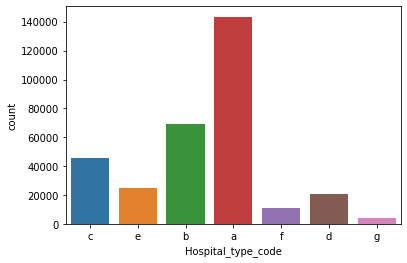

In [87]:
sns.countplot(x='Hospital_type_code',data=df)
plt.show()

But extra available beds parameter does not matter, only the LOS parameter is considered because the primary concern is dynamic allocation of beds and resources

In [88]:
pd.crosstab(columns=df['Hospital_type_code'],index=df['Decision'],normalize='columns')

Hospital_type_code,a,b,c,d,e,f,g
Decision,,,,,,,
0-10,0.073620,0.074624,0.078122,0.064447,0.072870,0.095581,0.039747
11-20,0.277546,0.202086,0.224656,0.216931,0.268228,0.217883,0.159458
21-30,0.280885,0.283425,0.272731,0.271078,0.263383,0.177240,0.278232
31-40,0.167154,0.179633,0.179019,0.181765,0.163908,0.195553,0.168108
41-50,0.028663,0.056464,0.040759,0.037275,0.030844,0.019060,0.032499
51-60,0.101914,0.100209,0.112698,0.133062,0.114332,0.183126,0.189619
61-70,0.006442,0.013300,0.009362,0.009123,0.007953,0.004111,0.010755
71-80,0.025951,0.037827,0.035077,0.037324,0.033266,0.045034,0.057517
81-90,0.013178,0.014881,0.015786,0.020648,0.015947,0.023732,0.029694


Irrespective of the type of hospital most people haven a LOS within the categories 11-20, 21-30, 31-40 and 51-60  days.

In [89]:
df['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [90]:
pd.crosstab(columns=df['Department'],index=df['Severity of Illness'],normalize='columns')

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
Severity of Illness,,,,,
Extreme,0.187982,0.183919,0.174270,0.194628,0.366361
Minor,0.246088,0.239974,0.278597,0.238252,0.081599
Moderate,0.565929,0.576107,0.547133,0.567120,0.552040


In almost all the departments the a large percentage of the cases are of moderate severity followed by minor and extreme.

In [91]:
pd.crosstab(columns=df['Department'],index=df['Decision'],normalize='columns')

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
Decision,,,,,
0-10,0.082516,0.051233,0.075551,0.083427,0.054954
11-20,0.248174,0.297582,0.239252,0.245055,0.215654
21-30,0.273107,0.301865,0.274096,0.254699,0.230641
31-40,0.182871,0.167223,0.174499,0.165276,0.166528
41-50,0.031296,0.028702,0.038764,0.030825,0.034971
51-60,0.109222,0.085231,0.112187,0.114182,0.165695
61-70,0.007928,0.005835,0.008922,0.009258,0.004163
71-80,0.030670,0.023711,0.032727,0.036576,0.040799
81-90,0.014605,0.012952,0.015023,0.018516,0.031640


Again in every department a large percentage of people have a length of stay between 21-30 days.

In [92]:
pd.crosstab(columns=df['Decision'],index=df['Severity of Illness'],normalize='index')

Decision,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Severity of Illness,,,,,,,,,,,
Extreme,0.059923,0.185427,0.273293,0.177811,0.041447,0.137105,0.011406,0.045396,0.019622,0.014192,0.034378
Minor,0.091601,0.315365,0.250780,0.168239,0.034936,0.083007,0.006044,0.022452,0.011471,0.004949,0.011156
Moderate,0.070171,0.230547,0.286926,0.174167,0.036351,0.114380,0.008974,0.032705,0.015582,0.008729,0.021468


In [93]:
pd.crosstab(columns=df['Decision'],index=df['Age'],normalize='columns')

Decision,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Age,,,,,,,,,,,
0-10,0.026055,0.025071,0.017019,0.018383,0.015924,0.016620,0.009475,0.014921,0.017363,0.012658,0.016460
11-20,0.065752,0.068378,0.049285,0.048605,0.043430,0.040808,0.032434,0.034133,0.046093,0.025678,0.031124
21-30,0.146882,0.144256,0.130231,0.125310,0.119050,0.108316,0.095845,0.100059,0.112857,0.083544,0.080952
31-40,0.208270,0.202101,0.212022,0.197828,0.202078,0.186104,0.185496,0.176224,0.165564,0.175045,0.146341
41-50,0.200263,0.191441,0.204661,0.199115,0.213489,0.205294,0.204810,0.209284,0.182927,0.209042,0.195571
51-60,0.145187,0.145203,0.149250,0.155351,0.147748,0.163887,0.163265,0.166764,0.162050,0.180470,0.179410
61-70,0.092950,0.100718,0.103245,0.107507,0.102614,0.116540,0.118440,0.119953,0.124018,0.119349,0.133024
71-80,0.093247,0.101844,0.108971,0.116391,0.117772,0.126592,0.137755,0.133314,0.138487,0.139602,0.158911
81-90,0.017878,0.017814,0.021945,0.027267,0.032275,0.030898,0.041910,0.039204,0.044647,0.047740,0.048780


**Feature Engineering**

In [94]:
df1=pd.get_dummies(data=df,columns=['Hospital_type_code','Department','Type of Admission','Severity of Illness','Age'],drop_first=True)

In [95]:
label_decision=preprocessing.LabelEncoder()

In [96]:
df1['Decision']=label_decision.fit_transform(df1['Decision'])

In [97]:
x=df1.drop(columns='Decision',axis=1)

In [98]:
y=df1['Decision']
y.head(7)

0    0
1    4
2    3
3    4
4    4
5    1
6    0
Name: Decision, dtype: int64

In [99]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Available Extra Rooms in Hospital  318438 non-null  int64  
 2   Bed Grade                          318438 non-null  float64
 3   patientid                          318438 non-null  int64  
 4   Hospital_type_code_b               318438 non-null  uint8  
 5   Hospital_type_code_c               318438 non-null  uint8  
 6   Hospital_type_code_d               318438 non-null  uint8  
 7   Hospital_type_code_e               318438 non-null  uint8  
 8   Hospital_type_code_f               318438 non-null  uint8  
 9   Hospital_type_code_g               318438 non-null  uint8  
 10  Department_anesthesia              318438 non-null  uint8  
 11  Department_gynecology              3184

**Modelling**

In [127]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=44,stratify=df1['Decision'])

In [130]:
decision_tree = DecisionTreeClassifier(random_state=44,max_depth=5,criterion='entropy')
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)

In [134]:
metrics.accuracy_score(y_val, y_pred)

0.30478269061675667

**Feature Importance**

In [135]:
importance = pd.DataFrame({'feature': x_train.columns, 'importance' : np.round(decision_tree.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
importance

,feature,importance
14,Type of Admission_Trauma,0.255
2,Bed Grade,0.252
1,Available Extra Rooms in Hospital,0.239
16,Severity of Illness_Minor,0.154
4,Hospital_type_code_b,0.047
15,Type of Admission_Urgent,0.020
10,Department_anesthesia,0.017
0,case_id,0.008
11,Department_gynecology,0.006
18,Age_11-20,0.000


**Finding the optimal depth of the tree**

In [136]:
max_depth_range = list(range(1, 15))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0,criterion='entropy')
    clf.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_val)
    score = metrics.accuracy_score(y_val, y_pred)
    accuracy.append(score)

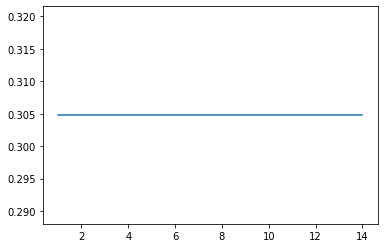

In [137]:
sns.lineplot(x=max_depth_range,y=accuracy,markers='o',dashes=True)
plt.show()

Max-depth does not affect the tree in this case.

**Evaluation Metrics**

In [145]:
metrics.precision_score(y_pred,y_val,average='weighted')

0.6225255382193209

In [146]:
metrics.accuracy_score(y_pred,y_val)

0.30478269061675667

**Impressions:**
A large number of people are being admitted into type 'a' hospital especially into Gynecology department with a moderate severity of illness and are expected to stay for a duration of 21-30 days.